In [4]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
from sklearn import linear_model, datasets

n_samples = 1000

X, y, coef = datasets.make_regression(n_samples=n_samples, n_features=20,
                                      n_informative=15, noise=10,
                                      coef=True, random_state=0)

lr = linear_model.LinearRegression()
lr.fit(X, y)

print('真實係數：\n', coef)
print('迴歸係數：\n', lr.coef_)

真實係數：
 [85.79423003  0.          0.          0.         98.65669029  9.40895033
 42.80685864 23.70573553 73.18146859 50.49940856 49.9292395  68.73521834
 17.6855849   5.74691257 37.93866559  0.         39.62084184  0.
 90.5314523  81.1036213 ]
迴歸係數：
 [ 8.60478995e+01 -3.47008512e-02 -5.65340632e-01 -3.59373281e-01
  9.86605662e+01  9.41588548e+00  4.23595228e+01  2.31705540e+01
  7.29948602e+01  5.00910730e+01  4.95431044e+01  6.89802775e+01
  1.82389664e+01  5.51075458e+00  3.80846210e+01  9.14070093e-02
  3.96022927e+01 -2.93836271e-01  9.03123905e+01  8.14636852e+01]


In [2]:
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
# 計算 Adjusted R-squared
def adj_R2(r2, n, k):
    return r2-(k-1)/(n-k)*(1-r2)

y_pred = lr.predict(X)
mse = mean_squared_error(y_pred, y)
r2 = r2_score(y_pred, y)
adj_r2 = adj_R2(r2, X.shape[0], X.shape[1])

print('RMSE = %.4f' % np.sqrt(mse))
print('Adj. R^2 = %.4f' % adj_r2)

RMSE = 9.9827
Adj. R^2 = 0.9980


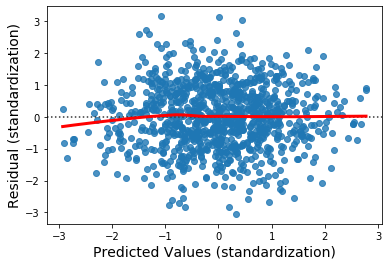

In [3]:
from sklearn.preprocessing import StandardScaler
import seaborn as sns

df_resid = pd.DataFrame()
df_resid['y_pred'] = y_pred
df_resid['resid'] = y - y_pred
df_resid
df_resid = StandardScaler().fit_transform(df_resid)

kws = {'color':'red', 'lw':3}
sns.residplot(x=df_resid[:, 0], y=df_resid[:, 1], 
              lowess=True, line_kws=kws)
plt.xlabel('Predicted Values (standardization)', fontsize=14)
plt.ylabel('Residual (standardization)', fontsize=14)
plt.show()